***
<h1>European Capitals - Clustering by cultural venues</h1>
<h2>Coursera Capstone Final Project (week 5, part 2)</h2>

**Author: Martin Stros**

Date: 2019/08/21
***

<p><img src='back.jpg' width='450'>

<h1>Introduction</h1>

European culture is largely rooted in what is often referred to as its "common cultural heritage". Because of the great number of perspectives which can be taken on the subject, it is impossible to form a single, all-embracing conception of European culture. Nonetheless, there are core elements which are generally agreed upon as forming the cultural foundation of modern Europe. 

<h1>Objective</h1>

In this project, I will focus only on capital cities in Europe, assuming they represent their countries and nation's culture.

Using Machine Learning clustering techniques, I will group the cities in clusters to determine:
<br>
* Similarity or dissimilarity of the cities from cultural point of view
* Classification of capitals into clusters and their visualization

Even though cuisine is usually a significant contributor to a nation's culture, I will leave out restaurants from the comparison. The idea is that while in Italy you will probably want to eat italian food and while in Berlin you will want to eat german food, even though there are hundreds of italian restaurants. Thus it does not make much sense in this scenario to cluster cities by the presence of restaurants. However, it might be a iteresting topic to explore in a separate project. 

The data I used contain venues like museums, theatres, concert halls etc.

As a tourist, you might find this information useful, for example, if you liked Sarajevo (Bosna i Hercegovina) you might as well like La Valletta (Malta) and Luxembourgh, due to a high number of history museums, theatres and movie theatres.

You can also use the model as a travel agent to recommend your customers different places to visit.

<h1>Data</h1>

The data come from Wikipedia, listing European countries and their capitals. This is pretty straightforward.

https://simple.wikipedia.org/wiki/List_of_European_countries

<p><img src='wiki.png' width='700'>

To complement the data with geolocations like latitude and longitude, I use Geopy library that pulls data from Nominatim. 
Geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

https://geopy.readthedocs.io

https://nominatim.openstreetmap.org/

<p><img src='capitals_map.png' width='700'>

The last but not least are data from Foursquare that I access through API. 

https://foursquare.com/

The problem with these data is that it will never fully cover the real world aspects of culture, like the nature of people, vibe in the city etc. So, even though Sarajevo, Luxembourhg and La Valletta all look alike in terms of most prevalent venues, you might get a very different feeling of the city once you visit it.

However, the data is sufficient for this project and study.

<p><img src='foursquare.png'>

For a sample comparison of two cities that will be clustered together, I will use word cloud.

<h1>Methodology</h1>

All parts of this project are coded in Python. The data from Wikipedia are scrapped using Pandas built in read_html function. After that, the data needs a little bit of cleaning, as there are some special characters that would break the next steps. Geolocations (from Nominatim's OpenStreetMaps) are then added using Geopy. Using FourSquare API, as much as 50 cultural venues close to the city center are pulled for each capital. The results are explored, for example finding the most common venues in each city.

To find groups of similar cities, the data is converted to a OneHot dataframe, and **is clustered using K-Means machine learning algorhytm. The optimal K is searched for.**

Finally, each cluster is inspected for typical venue categories that I will present using Word Cloud visualization method.

<h1>Results</h1>

Using the K-Means clustering method, the capital cities were divided into ten clusters and displayed on Folium Map.

With geolocations added, various colors indicate capital cities belonging to a specific cluster.

<p><img src='capitals_clustered.png' width='700'>

Not that geolocations of cluster centroids are any useful here, but for the sake of study purpose we can display centroids on a Folium Map (Python).

<p><img src='centroids_map.png' width='700'>

FourSquare is very useful to explore each city for venues and categorizing them. For example first ten rows of capital Brussels (Belgium) will give overview of what venues you can expect in the city.

<p><img src='brussels_venues.png' width='700'>

Let's use World Cloud to describe similar cities that were discovered using the described method and classified into the same cluster by K-Means.

As you can see, Brussels and Berlin are similar cities, at least from view of culture venues present. What connects them are: Museum, Theatre, Art, History.

<p><img src='two_city_wordcloud.png' width='700'>

<h1>Discussion</h1>

When using the K-Means method always brings the problem of finding the best K. If it is not known beforehand, one of the most common ways for find it is using the so called Elbow method. However, in this scenario, the Elbow chart does not reveal a significant turning point in the curve of diminishing squared distances. For that reason, I needed to choose the K in a different way. Given that there are 50 capitals in Europe, it does not make sense to split them into too much clusters. But being a diverse continent, neither too few clusters would work. K=10 was chosen as a compromise.

Otherwise, the K-Means works well for clustering of capital cities.

<p><img src='k_search.png' width='400'>

A different kind of problem is the limitation of the free version of Foursquare API. While the limit for each city is 50 venues, some smaller cities do not have more than 5 venues. For large cities like London and Paris, 50 venues is a small part of what the city has to offer. In reality, it would be very questionable to determine similarity of cities on a relatively small sample. But the value increases for someone who could be labeled as a 'mass tourist', who will always visit the main attractions and will not be looking for the 'hidden gems'.

<h1>Conclusion</h1>

FourSquare API is very powerful if used correctly, its advantage is that people use it all around the world. The discussion thread for every venue is very helpful to learn references from other visitors.

It is quite interesting to see that some smaller cities like Reykjavik, San Marino and Andorra la Vella are very unique and not like any other capital in Europe. On the other hand, it is great to know that after visiting the tourist staples like Prague, Madrid, London, one might go on visiting more 'exotic' places like Yerevan, Pristina, Podgorica, and have a similar experience.

<h1>Code</h1>

Use Pandas read_html function to scrape Wikipedia table.

In [14]:
import pandas as pd
import numpy as np

In [380]:
link = r'https://simple.wikipedia.org/wiki/List_of_European_countries'

df = pd.read_html(link, match='region',header=0)[0]
df.head(15)

,"Name of regiona[›] andterritory, with flag",Area(km²),Population(As of 2011),Population density(per km²),Capital
0,Albania,28748.0,2994667,104.1,Tirana
1,Andorra,468.0,84082,146.2,Andorra la Vella
2,Armenia,29800.0,2967975,99.5,Yerevan
3,Austria,83858.0,8217280,97.9,Vienna
4,Azerbaijan,86600.0,9165000,105.8,Baku
5,Belarus,207600.0,9434000,45.4,Minsk
6,Belgium,30510.0,10431477,341.9,Brussels
7,Bosnia and Herzegovina,51129.0,3890000,76.0,Sarajevo
8,Bulgaria,110910.0,7093635,63.9,Sofia
9,Croatia,56542.0,4290612,75.8,Zagreb


Replace the clumsy column names

In [382]:
df.columns = ['Country', 'Area', 'Population', 'Density', 'Capital']

Remove the special characters in some country names, as it would break the location search later. Example: Cypruse[›]

In [383]:
def clean_ctry_name(text):
    if text[-1] == ']':
        return text[:-4]
    else:
        return text
    
    
df['Country'] = df['Country'].apply(clean_ctry_name)

In [384]:
df.head(15)

,Country,Area,Population,Density,Capital
0,Albania,28748.0,2994667,104.1,Tirana
1,Andorra,468.0,84082,146.2,Andorra la Vella
2,Armenia,29800.0,2967975,99.5,Yerevan
3,Austria,83858.0,8217280,97.9,Vienna
4,Azerbaijan,86600.0,9165000,105.8,Baku
5,Belarus,207600.0,9434000,45.4,Minsk
6,Belgium,30510.0,10431477,341.9,Brussels
7,Bosnia and Herzegovina,51129.0,3890000,76.0,Sarajevo
8,Bulgaria,110910.0,7093635,63.9,Sofia
9,Croatia,56542.0,4290612,75.8,Zagreb


Import geocoder that provides geolocation (latitude and longitude).

In [19]:
from geopy.geocoders import Nominatim

Define function that will return geolocation data.

In [34]:
def get_loc(address):
    geolocator = Nominatim(user_agent='yeehaa')
    location = None
    while location == None:
        location = geolocator.geocode(address)    
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

Test the function on some capital city.

In [385]:
latitude, longitude = get_loc('Vienna, Austria')
print('Geolocations of Vienna, Austria are: {}, {}'.format(latitude, longitude))

Geolocations of Vienna, Austria are: 48.2083537, 16.3725042


Get geolocation of every capital city in the dataframe.

In [387]:
df['Latitude'] = 0
df['Longitude'] = 0
for i, row in df.iterrows():
    ctry = row['Country']
    capital = row['Capital']
    lat, long = get_loc(capital + ', ' + ctry)        
    df.loc[i, 'Latitude']  = lat
    df.loc[i, 'Longitude'] = long     
df.head()

,Country,Area,Population,Density,Capital,Latitude,Longitude
0,Albania,28748.0,2994667,104.1,Tirana,41.327946,19.818532
1,Andorra,468.0,84082,146.2,Andorra la Vella,42.506939,1.521247
2,Armenia,29800.0,2967975,99.5,Yerevan,40.177612,44.512585
3,Austria,83858.0,8217280,97.9,Vienna,48.208354,16.372504
4,Azerbaijan,86600.0,9165000,105.8,Baku,40.375443,49.832675


Import Folium for visulization of the data on a map.

In [48]:
import folium

Create map of Europe using latitude and longitude values.

In [388]:
map_europe = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Capital']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_europe)  
    
map_europe

Import requests module, define FourSquare credentials and constants for REST API request.

In [389]:
import requests 

CLIENT_ID = 'QH2S343QABQL0ARUQ0O5FWSQ2FWA5KURX1LTVSEPMTFD1WPL' # my Foursquare ID
CLIENT_SECRET = '4EF4PZYVWKKBJP0AOARASFGFQ4BVXB23UZ3UFVMDXHCEW3UU' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50
SECTION = 'arts'

Define function that uses REST API to explore top venues in given location.

In [390]:
def getTopVenues(names, latitudes, longitudes, section=SECTION, LIMIT=LIMIT):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&section={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            section, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    top_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    top_venues.columns = ['Capital', 
                  'Capital Lat', 
                  'Capital Lon', 
                  'Venue',
                  'Venue id',                
                  'Venue Lat', 
                  'Venue Lon', 
                  'Venue Category']
    
    return(top_venues)

Use the function on the dataframe.

In [391]:
capital_venues = getTopVenues(names=df['Capital'],
                                 latitudes=df['Latitude'],
                                 longitudes=df['Longitude'])
print('Done!')

Done!


See the most frequent venue categories accross Europe

In [392]:
capital_venues['Venue Category'].value_counts()[:10]

Theater              301
Art Gallery          270
History Museum       215
Museum               172
Music Venue          119
Concert Hall         109
Art Museum           106
Dance Studio          88
Outdoor Sculpture     84
Movie Theater         81
Name: Venue Category, dtype: int64

In [393]:
howmany = capital_venues['Venue Category'].unique().shape[0]
print('There are {} different venue categories!'.format(howmany))

There are 37 different venue categories!


Standardize data by OneHot encoding, which is neccesary for clustering.

In [394]:
# one hot encoding
df_onehot = pd.get_dummies(capital_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Capital'] = capital_venues['Capital'] 

# move neighborhood column to the first column
fixed_columns = ['Capital'] + list(df_onehot.columns.drop('Capital'))
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Capital,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Country Dance Club,Dance Studio,...,Piano Bar,Planetarium,Public Art,Rock Club,Salsa Club,Science Museum,Street Art,Theater,Tour Provider,Zoo Exhibit
0,Tirana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tirana,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Tirana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tirana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Tirana,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Quick check how many venues we have accross cities.

In [395]:
capital_venues.groupby('Capital').count().head()

,Capital Lat,Capital Lon,Venue,Venue id,Venue Lat,Venue Lon,Venue Category
Capital,,,,,,,
Amsterdam,50,50,50,50,50,50,50
Andorra la Vella,5,5,5,5,5,5,5
Ankara,50,50,50,50,50,50,50
Athens,50,50,50,50,50,50,50
Baku,18,18,18,18,18,18,18


Make dataframe of capital cities with venue % in each category

In [396]:
capitals_grouped = df_onehot.groupby('Capital').mean().reset_index()

In [397]:
capitals_grouped.head()

,Capital,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Country Dance Club,Dance Studio,...,Piano Bar,Planetarium,Public Art,Rock Club,Salsa Club,Science Museum,Street Art,Theater,Tour Provider,Zoo Exhibit
0,Amsterdam,0.0,0.180000,0.02,0.0,0.0,0.02,0.060000,0.0,0.020000,...,0.0,0.0,0.020000,0.00,0.0,0.020000,0.00,0.200000,0.02,0.0
1,Andorra la Vella,0.0,0.000000,0.00,0.2,0.0,0.00,0.000000,0.0,0.000000,...,0.0,0.0,0.200000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.0
2,Ankara,0.0,0.200000,0.00,0.0,0.0,0.00,0.040000,0.0,0.100000,...,0.0,0.0,0.100000,0.02,0.0,0.000000,0.02,0.080000,0.00,0.0
3,Athens,0.0,0.080000,0.04,0.0,0.0,0.00,0.000000,0.0,0.040000,...,0.0,0.0,0.020000,0.00,0.0,0.000000,0.00,0.480000,0.00,0.0
4,Baku,0.0,0.166667,0.00,0.0,0.0,0.00,0.166667,0.0,0.055556,...,0.0,0.0,0.055556,0.00,0.0,0.055556,0.00,0.166667,0.00,0.0


Define function that returns most common venues.

In [398]:
def return_most_common_venues(row, num_top_venues):
    #remove capital name, which is first row
    row_categories = row.iloc[1:]
    #sort
    row_categories_sorted = row_categories.sort_values(ascending=False)
    #return the first num_top_venues categories
    return row_categories_sorted.index.values[0:num_top_venues]

Run the function and get new dataframe.

In [399]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Capital']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
capitals_venues_sorted = pd.DataFrame(columns=columns)
capitals_venues_sorted['Capital'] = capitals_grouped['Capital']

for ind in np.arange(capitals_grouped.shape[0]):
    capitals_venues_sorted.iloc[ind, 1:] = return_most_common_venues(capitals_grouped.iloc[ind, :], num_top_venues)
    
capitals_venues_sorted.head()

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amsterdam,Museum,Theater,Art Gallery,Concert Hall,Erotic Museum
1,Andorra la Vella,Arts & Entertainment,Movie Theater,Public Art,Museum,Music Venue
2,Ankara,Music Venue,Art Gallery,Public Art,Dance Studio,Theater
3,Athens,Theater,Movie Theater,Art Gallery,Music Venue,History Museum
4,Baku,Concert Hall,Theater,Art Gallery,History Museum,Music Venue


See if there are any two capitals with exactly the same top 5 venue categories

In [400]:
capitals_venues_sorted.loc[(capitals_venues_sorted.iloc[:,1:].duplicated(keep=False))]

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue


Print most common venues for given cities.

In [401]:
num_top_venues = 7
capital_filter = ['Baku', 'Bucharest']

for hood in capitals_grouped['Capital']:
    if hood in capital_filter:
        print("----"+hood+"----")
        temp = capitals_grouped[capitals_grouped['Capital'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

----Baku----
            venue  freq
0     Art Gallery  0.17
1         Theater  0.17
2  History Museum  0.17
3    Concert Hall  0.17
4     Music Venue  0.11
5      Public Art  0.06
6    Dance Studio  0.06


----Bucharest----
            venue  freq
0         Theater  0.22
1     Art Gallery  0.20
2  History Museum  0.10
3     Music Venue  0.08
4    Dance Studio  0.08
5       Rock Club  0.06
6     Comedy Club  0.04




Use K-Means clustering algorithm. K=10.

In [174]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
%matplotlib inline

In [402]:
capitals_km_ready = capitals_grouped.drop('Capital',axis=1)
capitals_km_ready.head(5)

,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Country Dance Club,Dance Studio,Disc Golf,...,Piano Bar,Planetarium,Public Art,Rock Club,Salsa Club,Science Museum,Street Art,Theater,Tour Provider,Zoo Exhibit
0,0.0,0.180000,0.02,0.0,0.0,0.02,0.060000,0.0,0.020000,0.00,...,0.0,0.0,0.020000,0.00,0.0,0.020000,0.00,0.200000,0.02,0.0
1,0.0,0.000000,0.00,0.2,0.0,0.00,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.200000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.0
2,0.0,0.200000,0.00,0.0,0.0,0.00,0.040000,0.0,0.100000,0.02,...,0.0,0.0,0.100000,0.02,0.0,0.000000,0.02,0.080000,0.00,0.0
3,0.0,0.080000,0.04,0.0,0.0,0.00,0.000000,0.0,0.040000,0.00,...,0.0,0.0,0.020000,0.00,0.0,0.000000,0.00,0.480000,0.00,0.0
4,0.0,0.166667,0.00,0.0,0.0,0.00,0.166667,0.0,0.055556,0.00,...,0.0,0.0,0.055556,0.00,0.0,0.055556,0.00,0.166667,0.00,0.0


Try to find the best K

In [403]:
Ks = range(1, 50)

score = [KMeans(i,n_jobs=-1,n_init=25).fit(capitals_km_ready).inertia_ for i in Ks]

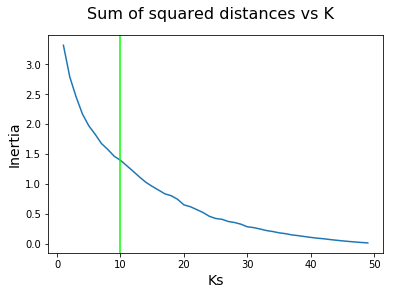

In [487]:
fig = plt.figure()
plt.plot(Ks,score)
#fig.axvline(10,color='lime')
fig.suptitle('Sum of squared distances vs K', fontsize=16)
plt.xlabel('Ks', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.axvline(10,color='lime')

There is no significant 'elbow', we will stick to 10

In [408]:
# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(capitals_km_ready)

capitals_plot = df.sort_values('Capital')
capitals_merged = capitals_grouped

# add clustering labels
capitals_merged['Cluster'] = kmeans.labels_
capitals_plot['Cluster'] = kmeans.labels_

# merge capitals_merged with capitals_venues_sorted to add latitude/longitude for each city
capitals_merged = capitals_merged.join(capitals_venues_sorted.set_index('Capital'), on='Capital')
capitals_plot = capitals_plot.join(capitals_venues_sorted.set_index('Capital'), on='Capital')

capitals_merged.head()

,Capital,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Country Dance Club,Dance Studio,...,Street Art,Theater,Tour Provider,Zoo Exhibit,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amsterdam,0.0,0.180000,0.02,0.0,0.0,0.02,0.060000,0.0,0.020000,...,0.00,0.200000,0.02,0.0,2,Museum,Theater,Art Gallery,Concert Hall,Erotic Museum
1,Andorra la Vella,0.0,0.000000,0.00,0.2,0.0,0.00,0.000000,0.0,0.000000,...,0.00,0.000000,0.00,0.0,9,Arts & Entertainment,Movie Theater,Public Art,Museum,Music Venue
2,Ankara,0.0,0.200000,0.00,0.0,0.0,0.00,0.040000,0.0,0.100000,...,0.02,0.080000,0.00,0.0,1,Music Venue,Art Gallery,Public Art,Dance Studio,Theater
3,Athens,0.0,0.080000,0.04,0.0,0.0,0.00,0.000000,0.0,0.040000,...,0.00,0.480000,0.00,0.0,0,Theater,Movie Theater,Art Gallery,Music Venue,History Museum
4,Baku,0.0,0.166667,0.00,0.0,0.0,0.00,0.166667,0.0,0.055556,...,0.00,0.166667,0.00,0.0,1,Concert Hall,Theater,Art Gallery,History Museum,Music Venue


Put data on Folium map.

In [409]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(capitals_plot['Latitude'], capitals_plot['Longitude'], capitals_plot['Capital'], capitals_plot['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

See how many cities are in each cluster

In [410]:
capitals_merged['Cluster'].value_counts()

1    13
6    11
5     8
0     8
2     4
7     3
9     1
8     1
4     1
3     1
Name: Cluster, dtype: int64

Make function that will allow to see cities in same cluster with important venue categories

In [365]:
def show_cities_in_cluster(df,clusterId):
    clusterdf = df.loc[(df['Cluster']==clusterId)]
    outcols = []
    numcols = {}
    for col in clusterdf.columns:
        if clusterdf[col].dtype != float:
            outcols.append(col)
        else:
            s = clusterdf[col].sum()
            if s > 0:
                numcols[col]=s
    numcolsSorted = sorted(numcols, key=numcols.get, reverse=True)
    outcols.extend(numcolsSorted)
    return clusterdf[outcols].set_index('Capital').transpose()

Let's see for example cluster 6, in which we have 6 cities

In [502]:
show_cities_in_cluster(capitals_merged,6)

Capital,Berlin,Brussels,Lisbon,Moscow,Riga,Rome,Stockholm,Tallinn,Tirana,Vienna,Zagreb
Cluster,6,6,6,6,6,6,6,6,6,6,6
1st Most Common Venue,Art Gallery,History Museum,History Museum,History Museum,Art Gallery,History Museum,History Museum,Theater,Theater,History Museum,Theater
2nd Most Common Venue,History Museum,Museum,Theater,Art Gallery,Museum,Art Museum,Museum,History Museum,History Museum,Museum,Museum
3rd Most Common Venue,Theater,Music Venue,Art Gallery,Museum,Concert Hall,Theater,Art Museum,Art Gallery,Concert Hall,Theater,Art Gallery
4th Most Common Venue,Art Museum,Art Museum,Concert Hall,Theater,Dance Studio,Museum,Outdoor Sculpture,Museum,Multiplex,Art Gallery,History Museum
5th Most Common Venue,Museum,Concert Hall,Museum,Concert Hall,Outdoor Sculpture,Art Gallery,Theater,Art Museum,Memorial Site,Art Museum,Movie Theater
History Museum,0.12,0.14,0.183673,0.16,0.08,0.234043,0.18,0.12,0.153846,0.24,0.113636
Museum,0.12,0.14,0.0816327,0.14,0.14,0.12766,0.14,0.1,0.0769231,0.18,0.136364
Theater,0.12,0.06,0.142857,0.12,0.06,0.12766,0.1,0.14,0.153846,0.08,0.136364
Art Gallery,0.16,0.04,0.142857,0.14,0.14,0.0851064,0.1,0.1,0.0769231,0.08,0.113636


Check centroids.

In [430]:
df.sort_values('Capital',inplace=True)
df.reset_index(drop=True,inplace=True)

In [436]:
df['Cluster'] = capitals_merged['Cluster']
df.head()

,Country,Area,Population,Density,Capital,Latitude,Longitude,Cluster
0,Netherlands,41526.0,16695000,402.0,Amsterdam,52.374540,4.897976,2
1,Andorra,468.0,84082,146.2,Andorra la Vella,42.506939,1.521247,9
2,Turkey,744820.0,72153000,96.8,Ankara,39.920777,32.854067,1
3,Greece,131940.0,10760136,81.5,Athens,37.984149,23.727984,0
4,Azerbaijan,86600.0,9165000,105.8,Baku,40.375443,49.832675,1


In [437]:
df.groupby('Cluster').mean()

,Area,Population,Density,Latitude,Longitude
Cluster,,,,,
0,1.311050e+05,1.728523e+07,120.662500,44.045047,18.509461
1,2.009872e+05,1.567598e+07,84.015385,46.788462,22.276391
2,2.668210e+04,4.983360e+06,4482.550000,48.148948,12.527471
3,1.600000e+02,3.523600e+04,220.200000,47.139286,9.522796
4,1.030000e+05,3.110580e+05,3.000000,64.244504,-21.769264
5,5.153891e+05,1.720940e+07,83.712500,49.653360,26.953673
6,1.689514e+06,2.999343e+07,114.090909,50.070709,16.163321
7,1.801033e+04,1.600545e+06,520.900000,43.188942,13.010013
8,6.100000e+01,3.181700e+04,521.500000,43.945862,12.458306


Put data on Folium map.

In [439]:
df_centroids = df.groupby('Cluster').mean()

# create map of Europe using latitude and longitude values
map_europe2 = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, label_clust in zip(df_centroids['Latitude'], df_centroids['Longitude'], df_centroids.index):    
    label = folium.Popup('Cluster: ' + str(label_clust), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color=rainbow[int(label_clust)-1],
        fill=True,
        fill_color=rainbow[int(label_clust)-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_europe2)  
    
map_europe2

Pick a random city to demonstrate World Cloud.

In [477]:
df.loc[(df['Capital'] == 'Brussels')]


,Country,Area,Population,Density,Capital,Latitude,Longitude,Cluster
9,Belgium,30510.0,10431477,341.9,Brussels,50.846557,4.351697,6


In [476]:
berlin_venues = capital_venues.loc[(capital_venues['Capital']=='Berlin')]
brussels_venues = capital_venues.loc[(capital_venues['Capital']=='Brussels')]

brussels_venues.head(10)

,Capital,Capital Lat,Capital Lon,Venue,Venue id,Venue Lat,Venue Lon,Venue Category
174,Brussels,50.846557,4.351697,AB Ancienne Belgique,4ade0d9cf964a520866c21e3,50.847143,4.349485,Concert Hall
175,Brussels,50.846557,4.351697,AB Club,50b65e05e4b03554b94c69c5,50.847313,4.348700,Concert Hall
176,Brussels,50.846557,4.351697,The Music Village,4ade0d7df964a520dc6b21e3,50.846902,4.350952,Jazz Club
177,Brussels,50.846557,4.351697,Cinéma Aventure,4bc99727fb84c9b6144b1b3e,50.848346,4.352858,Indie Movie Theater
178,Brussels,50.846557,4.351697,Bonnefooi,4b1821a3f964a52074cd23e3,50.847411,4.349398,Music Venue
179,Brussels,50.846557,4.351697,Cabaret Mademoiselle,59d7cbe65d891b58841d2d3d,50.846272,4.348727,Piano Bar
180,Brussels,50.846557,4.351697,AB Huis 23,519d09f7498e388944640b82,50.847428,4.349385,Concert Hall
181,Brussels,50.846557,4.351697,Beursschouwburg,4ade0d9cf964a520886c21e3,50.848762,4.348560,Theater
182,Brussels,50.846557,4.351697,Théâtre Royal des Galeries,4b8d60c3f964a52020f832e3,50.848349,4.355379,Theater
183,Brussels,50.846557,4.351697,Koninklijk Theater Toone / Théâtre Royal de To...,4b3e41d5f964a520429a25e3,50.847598,4.353787,History Museum


In [478]:
print(brussels_venues['Venue Category'].value_counts())

Museum                   7
History Museum           7
Music Venue              5
Art Museum               5
Outdoor Sculpture        4
Indie Movie Theater      4
Concert Hall             4
Theater                  3
Jazz Club                2
Art Gallery              2
Public Art               1
Performing Arts Venue    1
Street Art               1
Comedy Club              1
Opera House              1
Movie Theater            1
Piano Bar                1
Name: Venue Category, dtype: int64


Import World Cloud package

In [449]:
from wordcloud import WordCloud

Define World Cloud object.

In [473]:
capital_wc = WordCloud(
background_color='white',
    max_words=2000,
    stopwords=[]
)

capital_wc.generate(', '.join(brussels_venues['Venue Category'].tolist()))

Display World Cloud figure.

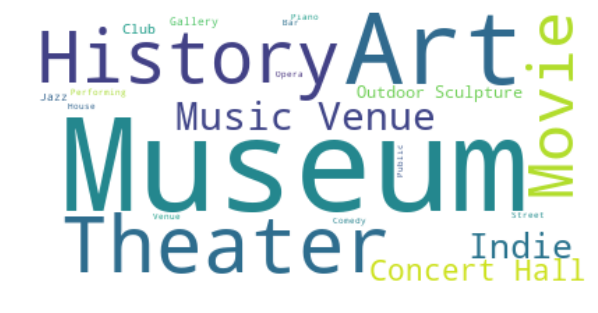

In [474]:
# display the word cloud
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height
plt.imshow(capital_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [475]:
# Uncomment this if you want to save the picture.
#fig.savefig('brussels.png')

For comparison, let's see how are two cities from same cluster similar.

<table>
    <tr>
        <td><h1><p>Brussels
        <td><h1><p>Berlin
    <tr>    
    <tr>
        <td><img src='brussels.png' height='252' width='324'>
        <td><img src='berlin.png' height='252' width='324'>
    </tr>
</table>